# 2017-10-02  Principal Components Analysis

## 1. How to use Jupyter
All our labs will be done in Jupyter notebooks. You should run your own instance of Jupyter, so that you can interact with the notebook, modify it and run Python code in it! Follow the instructions at https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html 

A Jupyter notebook is a web application that allows you to create and share documents (such as this .ipynb notebook) that contain live code, visualisations and explanatory text (with equations).

Here are some tips on using a Jupyter notebook:
* Each block of text is contained in a _cell_. A cell can be either raw text, code, or markdown text (such as this cell). For more info on markdown syntax, follow the [guide](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html).
* You can run a cell by clicking inside it and hitting `Shift+Enter` (or the play button in the toolbar).

In [1]:
2 + 2  # hit Shift+Enter to run

4

* If you want to create a new cell below the one you're running, hit `Alt+Enter` (or the plus button in the toolbar).

Some tips on using a Jupyter notebook with Python:
* A notebook behaves like an interactive python shell! This means that
    * classes, functions, and variables defined at the cell level have global scope throughout the notebok
    * hitting `Tab` will autocomplete the keyword you have started typing
    * typing a question mark after a function name will load the interactive help for this function.
* Jupyter has special Python commands (shortcuts, if you will) called _magics_. For instance, `%bash` will allow you to run bash code, `%paste` will allow you to paste a block of code while retaining its formating, and `%matplotlib inline` will import the visualization library matplotlib, and automatically display its plots inline, that is, below the cell. Here's a full list: http://ipython.readthedocs.io/en/stable/interactive/magics.html 
* Learn more about the interactive Python shell here: http://ipython.readthedocs.io/en/stable/interactive/tutorial.html

For more info on Jupyter: https://jupyter.org/

## 2. PCA of the Olympic Athletes data

In this lab, we will import data (`./data/decathlon.txt`) relating to the top performances in the Men's decathlon at the 2004 summer Olympics in Athens (https://en.wikipedia.org/wiki/Athletics_at_the_2004_Summer_Olympics_%E2%80%93_Men%27s_decathlon) and Decastar 2004 in Talence (https://fr.wikipedia.org/wiki/D%C3%A9castar). (Both events were won by Roman Šebrle).

###  Data description

* The data set consists of 41 rows and 13 columns.
* The first row is a header describing the content of the columns and the remaining rows refer to the 40 observations (athletes) considered in this dataset.
* Columns 1 to 12 are continuous variables: the first ten columns correspond to the performance of the athletes for each event of the decathlon and columns 11 and 12 correspond respectively to the rank and the points obtained.
* The last column is a categorical variable corresponding to the athletic meeting (2004 Olympic Games or 2004 Decastar).

### Loading and manipulating the data with pandas
pandas is a data analysis library for Python. With pandas we can import our Olympics athletes data into a structured object called a *data frame*, which we can then manipulate with pandas' built-in tools. Here we load the dataset into a data frame and begin to examine it with pandas.

In [40]:
import pandas as pd
my_data = pd.read_csv('data/decathlon.txt', sep="\t")  # load data

In [41]:
print(type(my_data))  # display my_data data type

<class 'pandas.core.frame.DataFrame'>


In [42]:
my_data.head(n=5)  # adjust n to view more data

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


### Accessing data

* We can select a column by name. Note the returned object is also a pandas object (a *series*--a single-columned DataFrame), so we can use the `head()` function to view the first few rows only.

In [43]:
my_data['100m'].head()

SEBRLE     11.04
CLAY       10.76
KARPOV     11.02
BERNARD    11.02
YURKOV     11.34
Name: 100m, dtype: float64

* Or a list for multiple columns.

In [44]:
columns = ['100m', '400m']
my_data[columns].head()

,100m,400m
SEBRLE,11.04,49.81
CLAY,10.76,49.37
KARPOV,11.02,48.37
BERNARD,11.02,48.93
YURKOV,11.34,50.42


* We can select rows satisfying a given condition(s) by passing a boolean series.

In [45]:
my_data[my_data['Competition']=='OlympicG'].head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,OlympicG
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,OlympicG
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,OlympicG
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,OlympicG
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,OlympicG


* To *index* a row, we can use the data frame's `loc` object. This behaves like a dictionary whose keys are the data frame's index.

In [46]:
my_data.loc['SEBRLE']

100m              11.04
Long.jump          7.58
Shot.put          14.83
High.jump          2.07
400m              49.81
110m.hurdle       14.69
Discus            43.75
Pole.vault         5.02
Javeline          63.19
1500m             291.7
Rank                  1
Points             8217
Competition    Decastar
Name: SEBRLE, dtype: object

In [47]:
my_data.count()  # summarise counts of data

100m           41
Long.jump      41
Shot.put       41
High.jump      41
400m           41
110m.hurdle    41
Discus         41
Pole.vault     41
Javeline       41
1500m          41
Rank           41
Points         41
Competition    41
dtype: int64

### Manipulating data

In [48]:
list(my_data.columns)  # get the names of the columns

['100m',
 'Long.jump',
 'Shot.put',
 'High.jump',
 '400m',
 '110m.hurdle',
 'Discus',
 'Pole.vault',
 'Javeline',
 '1500m',
 'Rank',
 'Points',
 'Competition']

In [49]:
print(my_data.shape)  # get the shape (rows x columns)

(41, 13)


In [50]:
print(my_data.values)  # get the content as a numpy array

[[11.04 7.58 14.83 2.07 49.81 14.69 43.75 5.02 63.19 291.7 1 8217
  'Decastar']
 [10.76 7.4 14.26 1.86 49.37 14.05 50.72 4.92 60.15 301.5 2 8122 'Decastar']
 [11.02 7.3 14.77 2.04 48.37 14.09 48.95 4.92 50.31 300.2 3 8099 'Decastar']
 [11.02 7.23 14.25 1.92 48.93 14.99 40.87 5.32 62.77 280.1 4 8067
  'Decastar']
 [11.34 7.09 15.19 2.1 50.42 15.31 46.26 4.72 63.44 276.4 5 8036 'Decastar']
 [11.11 7.6 14.31 1.98 48.68 14.23 41.1 4.92 51.77 278.1 6 8030 'Decastar']
 [11.13 7.3 13.48 2.01 48.62 14.17 45.67 4.42 55.37 268.0 7 8004 'Decastar']
 [10.83 7.31 13.76 2.13 49.91 14.38 44.41 4.42 56.37 285.1 8 7995
  'Decastar']
 [11.64 6.81 14.57 1.95 50.14 14.93 47.6 4.92 52.33 262.1 9 7802 'Decastar']
 [11.37 7.56 14.41 1.86 51.1 15.06 44.99 4.82 57.19 285.1 10 7733
  'Decastar']
 [11.33 6.97 14.09 1.95 49.48 14.48 42.1 4.72 55.4 282.0 11 7708 'Decastar']
 [11.33 7.27 12.68 1.98 49.2 15.29 37.92 4.62 57.44 266.6 12 7651
  'Decastar']
 [11.36 6.8 13.46 1.86 51.16 15.67 40.49 5.02 54.68 291.7 13 7

In [51]:
print(my_data.dtypes)  # get the data type (dtype) of each column

100m           float64
Long.jump      float64
Shot.put       float64
High.jump      float64
400m           float64
110m.hurdle    float64
Discus         float64
Pole.vault     float64
Javeline       float64
1500m          float64
Rank             int64
Points           int64
Competition     object
dtype: object


### Visualisation

To create visualisations, we'll use `matplotlib`, the primordial plotting library for Python. `matplotlib` may be used in different ways using a built-in interface called `pyplot`. This allows us to access matplotlib modules in a variety arrays from a high-level state-machine environment, to a low-level object-oriented approach). The latter is typically recommended. Another interface, `pylab`, is no longer recommended (http://matplotlib.org/faq/usage_faq.html#coding-styles).

We also use a Jupyter magic command for inline plotting.

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

We can optionally toggle vector graphics for Jupyter display, giving us a crisper plot (this can be expensive though, so beware!):

In [53]:
from IPython.display import Image, set_matplotlib_formats 
set_matplotlib_formats('pdf', 'svg') # toggle vector graphics for a crisp plot!

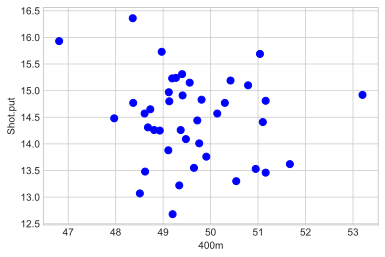

In [54]:
# basic visualization: athletes' performances depending on two disciplines
my_data.plot(kind='scatter', x='400m', y='Shot.put', s=50, color='blue')

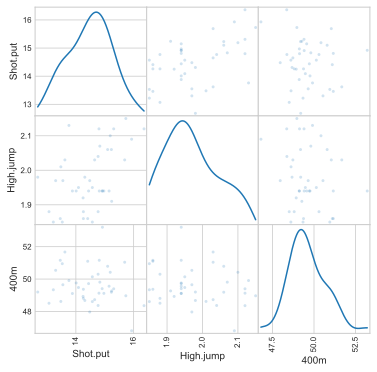

In [55]:
# A scatterplot matrix allows us to visualize:
#   * on the diagonal, the density estimation for each of the features
#   * on each of the off-diagonal plots, a scatterplot between two of the features. 
#     Each dot represents a sample.

from pandas.plotting import scatter_matrix
scatter_matrix(my_data.get(['Shot.put','High.jump', '400m']), alpha=0.2,
               figsize=(6, 6), diagonal='kde');

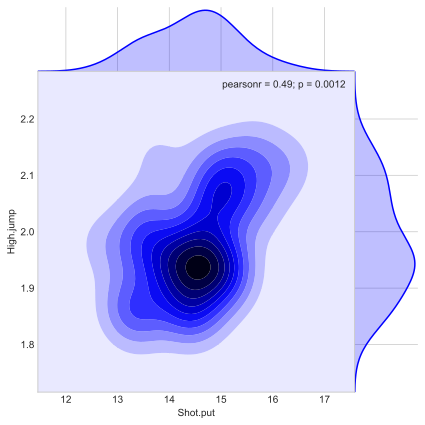

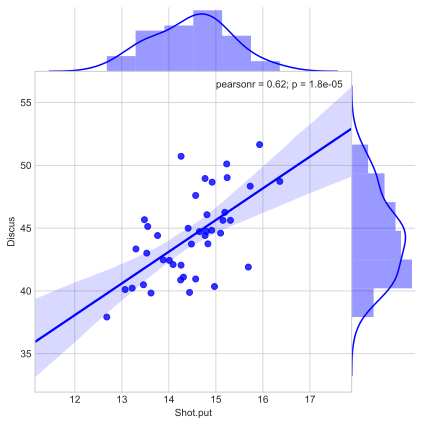

In [56]:
# fancier plot with seaborn : https://seaborn.pydata.org/
import seaborn.apionly as sns
sns.set_style('whitegrid')

sns.jointplot('Shot.put', 'High.jump', data = my_data, 
              kind='kde', size=6, space=0, color='b')

# loooking at correlated features
sns.jointplot('Shot.put', 'Discus', data = my_data, 
              kind='reg', size=6, space=0, color='b')

### Cleaning data

In [57]:
# Remove columns we don't need
data = my_data.drop(['Points', 'Rank', 'Competition'], axis=1)

# Verify new column headers
data.columns

Index(['100m', 'Long.jump', 'Shot.put', 'High.jump', '400m', '110m.hurdle',
       'Discus', 'Pole.vault', 'Javeline', '1500m'],
      dtype='object')

### Find the first two principal components of the data

We will first implement PCA ourselves. Recall PCA of $\mathbf{X} \in \mathbb{R}^{N \times D}$ finds $M$ principal components as the coluns of $\mathbf{W} \in \mathbb{R}^{D \times M}$ and a matrix of projected data $\mathbf{Z} \in \mathbb{R}^{N \times M}$, such that $\mathbf{Z}\mathbf{W}^T$ minimises the error as a reconstruction of $\mathbf{X}$ for the choice of $M$ (equivalently, the factorisation maximally explains the variance in $\mathbf{X}$). The principal components $\mathbf{W}$, correspond to the $M$ largest eigenvectors of the empirical covariance matrix $\boldsymbol\Sigma = \frac{1}{N}\mathbf{X}^T\mathbf{X}$.

**Question:** Recall that PCA works best on standardised data (mean 0, standard deviation 1). Standardise the data. **Hint**: you should aim to used numpy's vector-based operations.

In [58]:
import numpy as np

# transform data from to numpy array
X = data.values

# TODO: standardise the data

X_mean = np.mean(X,axis = 0)
X_std = np.std(X,axis = 0)

X_centered = (X-X_mean)/X_std


#X -= np.mean(X, axis = 0)
#X /= np.std(X,axis = 0)

**Question:** Find the two first components and project the data. These are the two largest eigenvectors of the empirical covariance matrix, $\boldsymbol\Sigma = \frac{1}{N}\mathbf{X}^T\mathbf{X}$.

In [59]:
from numpy import linalg

# TODO: calculate the the covariance matrix with numpy
N = X_centered.shape[0]
#sigma = np.dot(np.transpose(X),X)/N
X_cov = X_centered.T.dot(X_centered)/N


# TODO: find its two first principal components

w, v = linalg.eig(X_cov)
w, v = w[:2], v[:,:2]

#ind = np.argsort(eig_vals)
#v1,v2 = eig_vecs[:,ind[-1]],eig_vecs[:,ind[-2]]

# TODO: project X onto the principal components



X_projected = X_centered.dot(v)


Let's display the projected data. We use a jupyter magic command to display plots inline automatically.

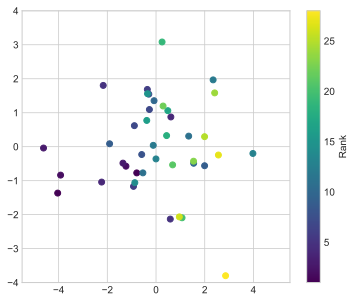

In [60]:
# create figure and axis objects
fig, ax = plt.subplots(figsize=(6, 5))
# create scatterplot on axis N.B. we record the return value to feed to the colorbar
cax = ax.scatter(X_projected[:, 0], X_projected[:, 1], c=my_data['Rank'],
                 cmap=plt.get_cmap('viridis'))
# Set axis limits
ax.set_xlim([-5.5, 5.5])
ax.set_ylim([-4, 4])
# Create color bar
plt.colorbar(cax, label='Rank')

**Question:** can you recognize a pattern ? Describe what you see.

**Answer:**

### Use scikit-learn to find the PCs

In this course, we will rely heavily on the [scikit-learn](http://scikit-learn.org/stable/index.html) machine learning toolbox, which implements most classical, (non-deep) machine learning algorithms. Here, we will use scikit-learn to compute the PCs, and compare the results to what we got before. A useful resource is the online documentation: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [61]:
from sklearn import decomposition, preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Question:** Use `pca.transform` to project the data onto its principal components.

In [62]:
# TODO: project X on principal components
X_projected = pca.transform(X_scaled)


`pca.explained_variance_ratio_` gives the percentage of variance explained by each of the components.

In [63]:
print(pca.explained_variance_ratio_)

[ 0.32719055  0.1737131 ]


**Question:** How is `pca.explained_variance_ratio_` computed? Check this is the case by computing it yourself.

In [64]:
tot_var = np.var(X_scaled, axis=0).sum()
print((1 / tot_var) * np.var(X_projected, axis=0))

[ 0.32719055  0.1737131 ]


Project the data onto its principal components after standardizing.
 
**Question:** Plot the fraction of variance explained by each of the first 10 principal components.

In [ ]:
# TODO: calculate the first ten components


ValueError: incompatible sizes: argument 'height' must be length 10 or scalar

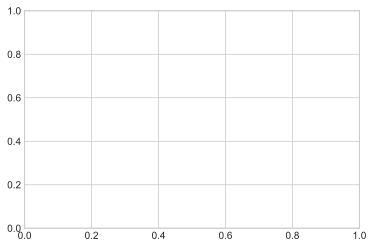

In [65]:
plt.bar(np.arange(10), pca.explained_variance_ratio_, color='blue')
plt.xlim([-1, 9])
plt.xlabel("Number of PCs", fontsize=16)
plt.ylabel("Fraction of variance explained", fontsize=16)

To better understand the information captured by the principal components, we can consider  `pca.components_`. These are the columns of $\mathbf{W}$ (for $M = 2$).

In [67]:
pcs = pca.components_
print(pcs[0])

[-0.42829627  0.41015201  0.34414444  0.31619436 -0.3757157  -0.41255442
  0.30542571  0.02783081  0.15319802 -0.03210733]


We can display each row of $\mathbf{W}$ in a 2D plot whose x-axis gives its contribution to the first component and y-axis to the second component. Note, whereas before we were visualising the projected data, $\mathbf{Z}$, now we are visualising the projections, $\mathbf{W}$. This indicates how the features cluster i.e. if a pair of feature projections are close, observations will tend to be similarly-valued over those features.

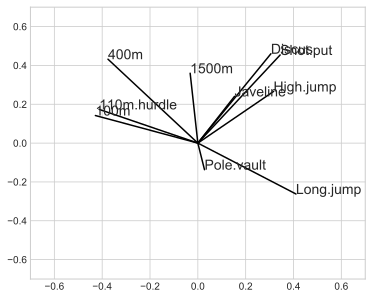

In [68]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-0.7, 0.7])
ax.set_ylim([-0.7, 0.7])

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # plot line between origin and point (x, y)
    ax.plot([0, x], [0, y], color='k')
    # display the label of the point
    ax.text(x, y, data.columns[i], fontsize='14')

**Question:** based on the two previous graphs, can you find a meaning for the two principal components ?

**Answer:**

## 3 Singular Value Decomposition for PCA

We have seen above that PCA can be performed by computing the eigendecomposition of the covariance matrix. An alternative way of performing PCA is with singular value decomposition (SVD) (https://en.wikipedia.org/wiki/Singular_value_decomposition). SVD effectively generalises the eigendecomposition to non-square matrices, factorising a matrix $\mathbf{X} \in \mathbb{R}^{N\times M}$ as $\mathbf{X} = \mathbf{U}\mathbf{S}\mathbf{V}^T$, where $\mathbf{U} \in \mathbb{R}^{N\times N}$ and $\mathbf{V} \in \mathbb{R}^{D\times D}$ are orthonormal, and $\mathbf{S} \in \mathbb{R}^{N\times D}$ is the diagonal matrix of *singular values* with zero rows. Notice that the covariance matrix of $\mathbf{X}$, $$\mathbf{\Sigma} = \mathbf{X}^T\mathbf{X} = \mathbf{V}\mathbf{S}\mathbf{U}^T\mathbf{U}\mathbf{S}\mathbf{V}^T = \mathbf{V}\mathbf{S}^2\mathbf{V}^T,$$ which is an eigenvalue decomposition. Hence, there is a strong link between PCA and SVD: $\mathbf{W} = \mathbf{U}$ are the principal components and $\mathbf{Z} = \mathbf{X}\mathbf{W}^T = \mathbf{U}\mathbf{S}\mathbf{V}^T\mathbf{V} = \mathbf{U}\mathbf{S}$ are the projected data. Therefore, we can use SVD to perform PCA.

### Loading image data

For this task, we will use a classic image from image analysis, "Lena". We start by loading and visualising the image with matplotlib's `imread()` and `imshow()` functions:

In [ ]:
import scipy.misc
img = scipy.misc.imread('data/lena.jpg').astype(float)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

### Normalise the data

**Question**: We should first normalise the data by subtracting the mean of each column: $\mathbf{x}'_{:, i} = \mathbf{x}_{:, i} - \frac{1}{N} \sum_{i=1}^Nx_{ij}$

In [ ]:
# TODO: normalise the data prior to SVD

### Perfom SVD

**Question:** use the `svd()` function from numpy.linalg to perform SVD.

In [ ]:
# TODO: SVD in numpy. The function should return a tuple U, S, V

**Question:** Reconstruct the *Lena* image from the factorisation. You should plot the reconstruction to check.

In [ ]:
# TODO: reconstruct Lena

### Truncated SVD

To create a lower-rank PCA projection, take the $M$ largest singular values in $\mathbf{S}$, and the corresponding vectors of $\mathbf{U}$ and $\mathbf{V}$. This is equivalent to taking the $M$ largest eigenvectors for PCA, and is known as *truncated SVD*. Note that we are doing PCA on the rows of the image (which are not independent, but this use of PCA as a form of lossy compression is interesting).

In [ ]:
fig = plt.figure(figsize=(6, 6))

for i, M in enumerate([5, 10, 20, 100]):
    # TODO: reconstruct X from truncated matrices
    
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(Z, cmap='gray')
    ax.set_title('No. components = %d' % M)
    ax.axis('off')

plt.tight_layout()
plt.show()

**Question:** What do you observe? How much compression (in terms of floating point numbers stored) is achieved in each case?

**Answer:**